# Dataline Analytics Competition
## Context:

The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing 17% to the country's GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generted approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa. Tanzania is the only country in the world which has allocated more than 25% of it's total area of wildlife, national parks and protected areas. There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area.

## Objective:

The objective of this competition is to explore and build a linear regression model that will predict the spending behaviour of tourists visiting Tanzania. The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania.

## Data Description

The dataset describes 6476 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania. The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth. The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points. 

### Importing necessary libraries and data

In [4]:
# Install a conda package from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\PC\Desktop\dataline_project\env

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd3eb1b0_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [138]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, we've got our tools ready for data analysis, we can import the data and start to explore it.


In [139]:
# Import training and test data
train_data = pd.read_csv("Train .csv")
test_data = pd.read_csv("Test .csv")

### Data Overview

* Observations
* Sanity checks

#### Observations

In [140]:
train_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [141]:
# Get more information about our training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [142]:
# Check out missing values
train_data.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [143]:
# Check datatypes in our training data
train_data.dtypes


ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

In [144]:
train_data.dtypes.value_counts()

object     18
float64     5
dtype: int64

In [145]:
train_data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [146]:
len(train_data.columns)

23

In [147]:
# Let's have a quick statistical overview of the numerical columns.
train_data.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [148]:
test_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [149]:
# Take a look at our test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [150]:
test_data.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
payment_mode              object
first_trip_tz             object
most_impressing           object
dtype: object

In [151]:
test_data.isna().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [152]:
# Let's have a quick statistical overview of our the numerical columns in the test data
test_data.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,1600.000000,1599.000000,1601.000000,1601.000000
mean,0.925625,1.056911,8.741412,2.495315
std,1.169807,1.309879,19.788490,6.266489
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,5.000000,0.000000
75%,1.000000,1.000000,10.000000,4.000000
max,20.000000,40.000000,664.000000,174.000000


In [153]:
test_data.dtypes.value_counts()

object     18
int64       2
float64     2
dtype: int64

In [154]:
test_data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing'],
      dtype='object')

In [155]:
len(test_data.columns)

22

In [156]:
train_data.duplicated().sum()

0

#### Sanity Checks


From the little observations from above it can be derived that:

* **The train_data has:**
    * Twenty-three Columns
    * Four columns with missing values
    * Eighteen object data type columns and five float64 data type columns
    
    
* **The test_data has:**
    * Twenty-two columns
    * Three columns with missing values
    * Eighteen object data type columns, two float64 data type columns and two int64 data type columns

### Exploratory Data Analysis (EDA)

* EDA is an important part of any project involving data.
* It is important to investigate and understand the data better before building a model with it.
* A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
* A thorough analysis of the data, in addition to the questions mentioned below, should be done.  

#### Questions:
1. What are the top 5 countries with the highest spending statistic?
2. Which age-group are the highest spenders and who are the overall highest spenders by travel with?
3. Which country have the most spending tourists?
4. What is the average number of nights a tourist spends in Tanzania mainland?
5. What is the average number of nights a tourists spends in Zanzibar?
6. What is the most prefered payment mode by tourists?
7. Highlight the aspects of tourism that are more profitable and in which it is more worthwhile to invest in.
8. What is the most sought after food by tourists?

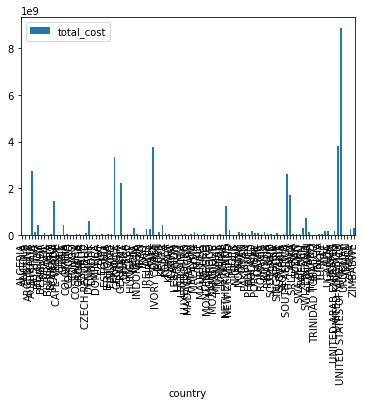

In [157]:
train_data.groupby(train_data['country']).agg('sum').plot(kind='bar', y=['total_cost'])
plt.show()

In [158]:
#  top 5 countries with the highest spending statistic 
# USA, Italy, United Kingdom, France, Australia

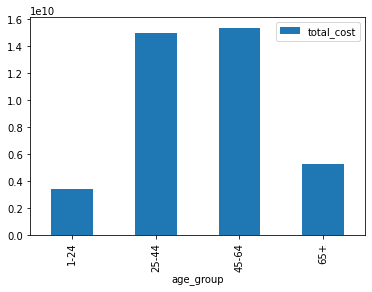

In [159]:
train_data.groupby(train_data['age_group']).agg('sum').plot(kind='bar', y=['total_cost'])
plt.show()

In [160]:
# age_group 45-64 are the highest spenders

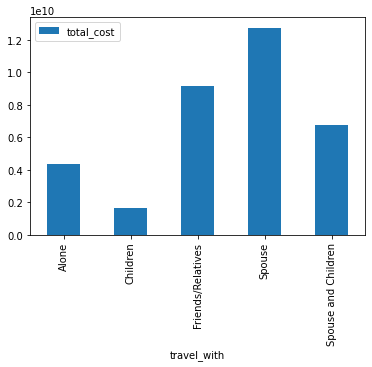

In [161]:
train_data.groupby(train_data['travel_with']).agg('sum').plot(kind='bar', y=['total_cost'])
plt.show()

In [162]:
# Spouse is the highest spenders in travel with
#USA has the most spending tourists

In [163]:
#average number of nights a toursits spends in Tanzania mainland
print("avg_number_nights_tanzania_mainland = ", train_data["night_mainland"].mean())

avg_number_nights_tanzania_mainland =  8.488043252235393


In [164]:
#average number of nights a toursits spends in Zanzibar
print("avg_number_nights_zanzibar = ", train_data["night_zanzibar"].mean())

avg_number_nights_zanzibar =  2.30442919525889


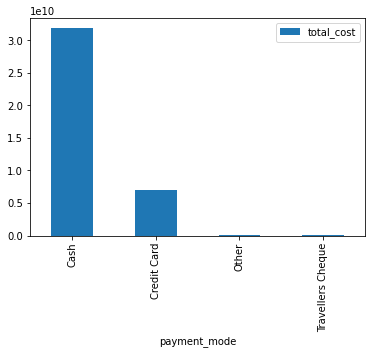

In [165]:
train_data.groupby(train_data['payment_mode']).agg('sum').plot(kind='bar', y=['total_cost'])
plt.show()

In [166]:
# Cash is the most prefered payment mode by tourists

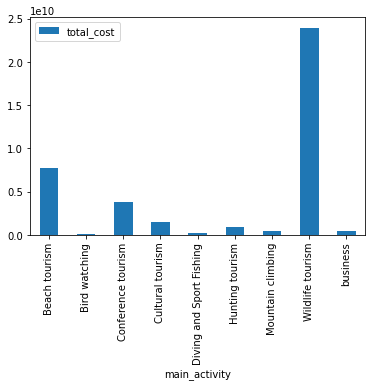

In [167]:
train_data.groupby(train_data['main_activity']).agg('sum').plot(kind='bar', y=['total_cost'])
plt.show()

In [168]:
# Aspects of tourism that are more profitable and in which it is worthwhile to invest in are
# Beach & Wildlife Tourism

In [169]:
# Question 8 doesn't have data provision for most sort after food by tourists

In [170]:
#Univariate Analysis
#calculate mean, median and mode of dat total_cost
mean = train_data["total_cost"].mean()
median =train_data["total_cost"].median()
mode = train_data["total_cost"].mode()
print(mean , median, mode)

8114388.777617801 3397875.0 0    1657500.0
dtype: float64


C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


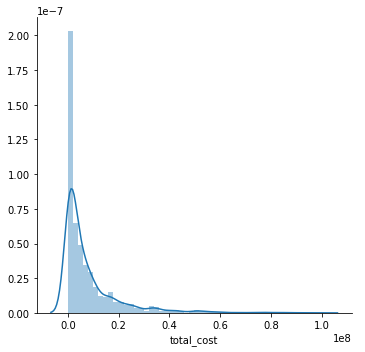

In [171]:
#distribution plot
sns.FacetGrid(train_data,size=5).map(sns.distplot,"total_cost").add_legend()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


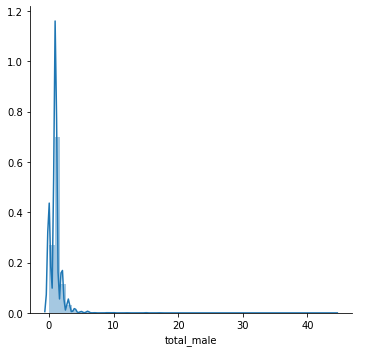

In [172]:
#distribution plot
sns.FacetGrid(train_data,size=5).map(sns.distplot,"total_male").add_legend()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


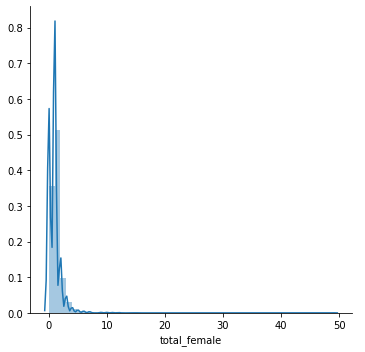

In [173]:
#distribution plot
sns.FacetGrid(train_data,size=5).map(sns.distplot,"total_female").add_legend()

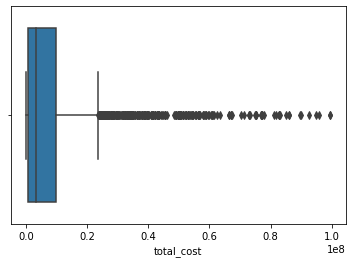

In [174]:
#boxplot for total cost
sns.boxplot(x="total_cost",data=train_data)
plt.show()


Text(0, 0.5, 'total_cost')

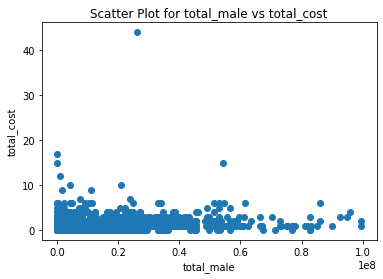

In [175]:
#Bivariate Analysis
# plot the relationship between “total_cost” and ”total_male”
plt.scatter(train_data["total_cost"], train_data["total_male"])
plt.title("Scatter Plot for total_male vs total_cost")
plt.xlabel("total_male")
plt.ylabel("total_cost")


Text(0, 0.5, 'total_cost')

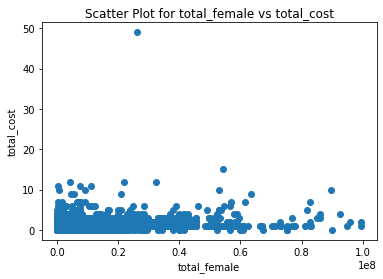

In [176]:
#Bivariate Analysis
# plot the relationship between “total_cost” and ”total_female”
plt.scatter(train_data["total_cost"], train_data["total_female"])
plt.title("Scatter Plot for total_female vs total_cost")
plt.xlabel("total_female")
plt.ylabel("total_cost")


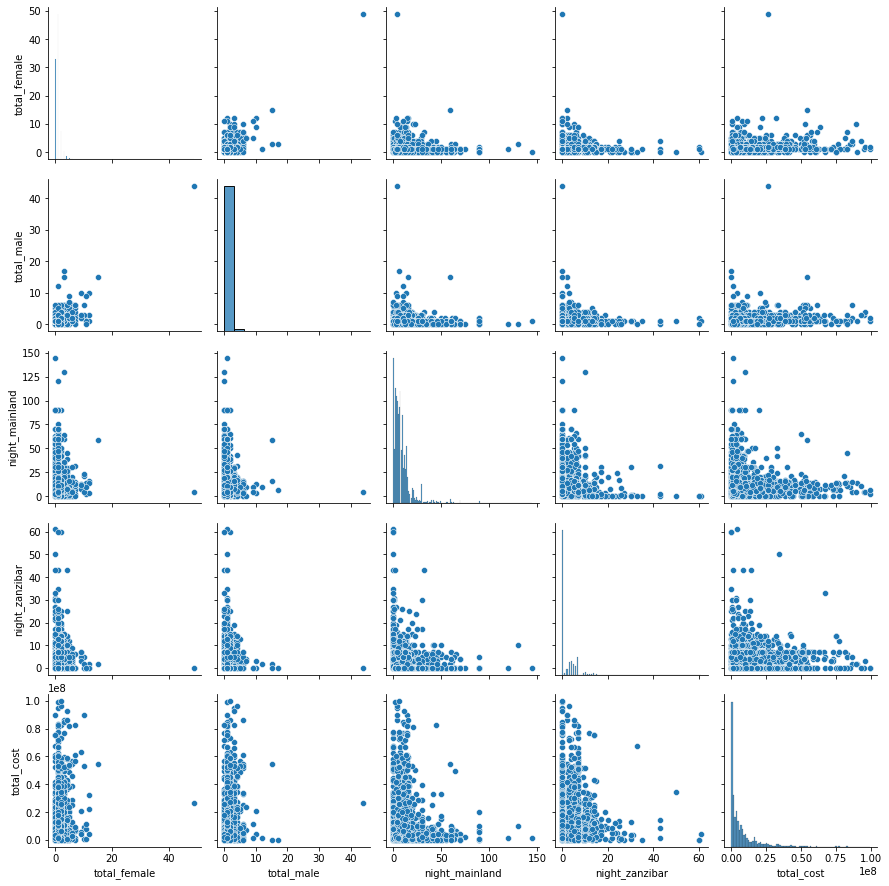

In [177]:
sns.pairplot(train_data)
plt.show()

<AxesSubplot:>

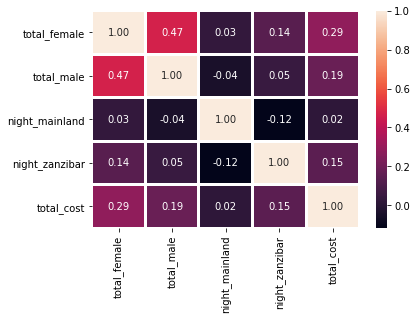

In [178]:
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', linewidths=2)

In [179]:
#total female is positively correlated to total male
#total female is weakly positively correlated to total cost
#total male is weakly positively correlated to total cost
#night mainland is weakly correlated to night zanzibar

In [180]:
correlation = train_data.corr(method='pearson')
correlation


,total_female,total_male,night_mainland,night_zanzibar,total_cost
total_female,1.000000,0.471180,0.031200,0.138555,0.286097
total_male,0.471180,1.000000,-0.041964,0.050318,0.185848
night_mainland,0.031200,-0.041964,1.000000,-0.118155,0.020473
night_zanzibar,0.138555,0.050318,-0.118155,1.000000,0.145139
total_cost,0.286097,0.185848,0.020473,0.145139,1.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_cost', ylabel='Density'>

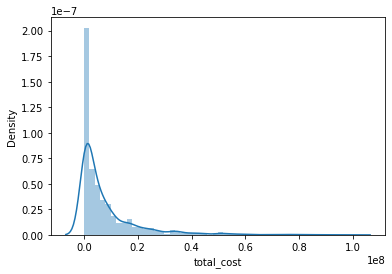

In [181]:
sns.distplot(train_data['total_cost'])

In [182]:
from scipy.stats import skew
skew(train_data['total_cost'])


2.966922252840033

In [183]:
#It is positively skewed

In [184]:
# Kurtosis of data in data using skew() function
kurtosis =train_data.kurt()
print(kurtosis)
# Kurtosis of the specific column (Total cost)
sk_cost=train_data.loc[:,"total_cost"].kurt()
print(sk_cost)


total_female      416.090526
total_male        445.338624
night_mainland     26.392706
night_zanzibar     35.987216
total_cost         11.431051
dtype: float64
11.431051199158194


In [185]:
#Total cost is Leptokurtic

### Data Preprocessing

* Missing value treatment(if needed)
* Feature engineering
* Outlier detection and treatment (if needed)
* Preparing data for modelling
* Feature importance
* Scaling

In [186]:
dp = ["Missing_value_treatment",
     "Feature_engineering",
     "Outlier_detection_and_treatment",
     "Preparing_data_for_modelling",
     "Feature_importance",
     "Scaling"]
dp

['Missing_value_treatment',
 'Feature_engineering',
 'Outlier_detection_and_treatment',
 'Preparing_data_for_modelling',
 'Feature_importance',
 'Scaling']

### Missing value treatment

First, we have a look at our train and test data again, then we'll see what we can improve/fix.

#### Train Data

In [187]:
train_data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [188]:
# Have a quick overview of our data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [189]:
train_data.dtypes.value_counts()

object     18
float64     5
dtype: int64

In [190]:
# Check out columns with missing values
train_data.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

We can see that our train_data has 4 columns with missing values which are travel_with, total_female, total_male and most_impressing columns respectively. We'll work on filling them in the cells below

In [191]:
train_data.iloc[:, [3, 4, 5, 21]]

,travel_with,total_female,total_male,most_impressing
0,Friends/Relatives,1.0,1.0,Friendly People
1,NaN,1.0,0.0,"Wonderful Country, Landscape, Nature"
2,Alone,0.0,1.0,Excellent Experience
3,Spouse,1.0,1.0,Friendly People
4,NaN,1.0,0.0,No comments
...,...,...,...,...
4804,Alone,0.0,1.0,No comments
4805,Spouse,1.0,1.0,Friendly People
4806,NaN,1.0,0.0,Good service
4807,Friends/Relatives,1.0,1.0,Friendly People


In [192]:
# First, let's check the data types of our missing columns
train_data["travel_with"].dtype, train_data["total_female"].dtype, train_data["total_male"].dtype, train_data["most_impressing"].dtype

(dtype('O'), dtype('float64'), dtype('float64'), dtype('O'))

From the cell above we can see that travel_with and most_impressing columns are object types while total_female and total_male columns are floats.

* Let's preprocess the travel_with column


In [193]:
train_data["travel_with"]

0       Friends/Relatives
1                     NaN
2                   Alone
3                  Spouse
4                     NaN
              ...        
4804                Alone
4805               Spouse
4806                  NaN
4807    Friends/Relatives
4808               Spouse
Name: travel_with, Length: 4809, dtype: object

In [194]:
train_data["travel_with"].value_counts()

Alone                  1265
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: travel_with, dtype: int64

Here we see that Alone is the most frequent value of the travel_with column

In [195]:
# Check out number of missing values
train_data["travel_with"].isna().sum()

1114

We have seen that the most frequent value of the travel_with column is Alone but we will fill the missing values with "unknown".

In [196]:
# Fill missing values with "Unknown"
train_data["travel_with"].fillna("Unknown", inplace=True)

In [197]:
# Check to see if there are still any missing values
train_data["travel_with"].isna().sum()

0

In [198]:
train_data["travel_with"].value_counts()

Alone                  1265
Unknown                1114
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: travel_with, dtype: int64

* Let's preprocess the total_female and total_male column

We'll fill the missing values in the total_male and total female columns with the most occuring value(mode)

In [199]:
train_data["total_female"].value_counts()


1.0     2418
0.0     1669
2.0      463
3.0      144
4.0       46
5.0       25
6.0       15
7.0       10
9.0        4
10.0       4
11.0       3
12.0       3
49.0       1
15.0       1
Name: total_female, dtype: int64

In [200]:
# Check the total number of missing value in the total male and total female columns
train_data["total_female"].isna().sum(), train_data["total_male"].isna().sum()

(3, 5)

The total_female column has 3 missing values while the total_male column has 5 missing values

In [201]:
len(train_data["total_female"])

4809

In [202]:
# Check the most occuring values of the total_male and total_female columns
train_data["total_female"].value_counts(), train_data["total_male"].value_counts()

(1.0     2418
 0.0     1669
 2.0      463
 3.0      144
 4.0       46
 5.0       25
 6.0       15
 7.0       10
 9.0        4
 10.0       4
 11.0       3
 12.0       3
 49.0       1
 15.0       1
 Name: total_female, dtype: int64,
 1.0     2961
 0.0     1137
 2.0      478
 3.0      139
 4.0       46
 6.0       17
 5.0       15
 9.0        2
 10.0       2
 7.0        2
 15.0       2
 17.0       1
 44.0       1
 12.0       1
 Name: total_male, dtype: int64)

In [203]:
# Fill the total_female and total_male columns with the mode
train_data["total_female"].fillna(1, inplace=True), train_data["total_male"].fillna(1, inplace=True)

(None, None)

In [204]:
# Check that there are no more missing values
train_data["total_female"].isna().sum(), train_data["total_female"].isna().sum()

(0, 0)

* Let's preprocess the most_impressing column

In [205]:
# Check the number of missing values
train_data["most_impressing"].isna().sum()

313

In [206]:
# Check the most occuring value within the column
train_data["most_impressing"].value_counts()

Friendly People                         1541
 Wildlife                               1038
No comments                              743
Wonderful Country, Landscape, Nature     507
Good service                             365
Excellent Experience                     271
Satisfies and Hope Come Back              31
Name: most_impressing, dtype: int64

In [207]:
# Fill the missing values with Unknown
train_data["most_impressing"].fillna("Unknown", inplace=True)

In [208]:
# Check to see missing values have been filled
train_data["most_impressing"].isna().sum()

0

In [209]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            4809 non-null   object 
 4   total_female           4809 non-null   float64
 5   total_male             4809 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [210]:
train_data.isna().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

#### test_data

In [211]:
test_data.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

The test data has 4 columns with missing data too just like the train_data. Let's start filling them up

In [212]:
test_data.iloc[:, [3, 4, 5, 21]]

,travel_with,total_female,total_male,most_impressing
0,Spouse,1.0,1.0,Wildlife
1,Friends/Relatives,0.0,4.0,"Wonderful Country, Landscape, Nature"
2,Friends/Relatives,3.0,0.0,No comments
3,Friends/Relatives,2.0,0.0,Friendly People
4,Friends/Relatives,2.0,2.0,Friendly People
...,...,...,...,...
1596,NaN,0.0,1.0,NaN
1597,Spouse and Children,3.0,1.0,Wildlife
1598,Alone,0.0,1.0,No comments
1599,Alone,0.0,1.0,Wildlife


* Preprocess the travel_with column

In [213]:
# Fill the travel_with column missing values with "Unknown"
test_data["travel_with"].fillna("Unknown", inplace=True)

In [214]:
# Check to see if missing values have been filled
test_data["travel_with"].isna().sum()


0

* Preprocess the most_impressing column

In [215]:
# Fill the missing values in the most_impressing column with "Unknown"
test_data["most_impressing"].fillna("Unknown", inplace=True)

In [216]:
# Check to see if missing values have been filled
test_data["most_impressing"].isna().sum()

0

* Preprocess the total_female and total_male columns

In [217]:
# Fill the total_female and total_male columns with the mode
test_data["total_female"].value_counts(), test_data["total_male"].value_counts()

(1.0     800
 0.0     552
 2.0     168
 3.0      49
 4.0      14
 5.0       4
 6.0       3
 7.0       3
 11.0      2
 10.0      2
 12.0      1
 20.0      1
 9.0       1
 Name: total_female, dtype: int64,
 1.0     1006
 0.0      337
 2.0      180
 3.0       44
 4.0       18
 5.0        6
 7.0        4
 6.0        2
 40.0       1
 10.0       1
 Name: total_male, dtype: int64)

In [218]:
test_data["total_female"].fillna(1, inplace=True), test_data["total_male"].fillna(1, inplace=True)

(None, None)

In [219]:
test_data["total_female"].isna().sum(), test_data["total_female"].isna().sum()

(0, 0)

In [220]:
test_data.isna().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
dtype: int64

In [221]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            4809 non-null   object 
 4   total_female           4809 non-null   float64
 5   total_male             4809 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

#### Outlier Detection

In [222]:
train_data.dtypes.value_counts()

object     18
float64     5
dtype: int64

Here we see that our train_data has 5 float data types columns and these are the columns we'll be looking to detect the outliers. The float dtype columns are total_male, total_female, night_zanzibar, night_mainland and total_cost columns

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_male'>

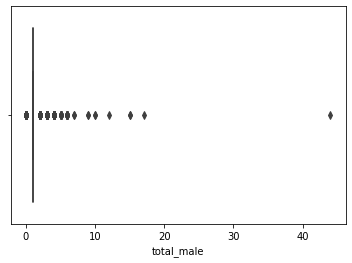

In [223]:
# Box plot
import seaborn as sns
sns.boxplot(train_data["total_male"])

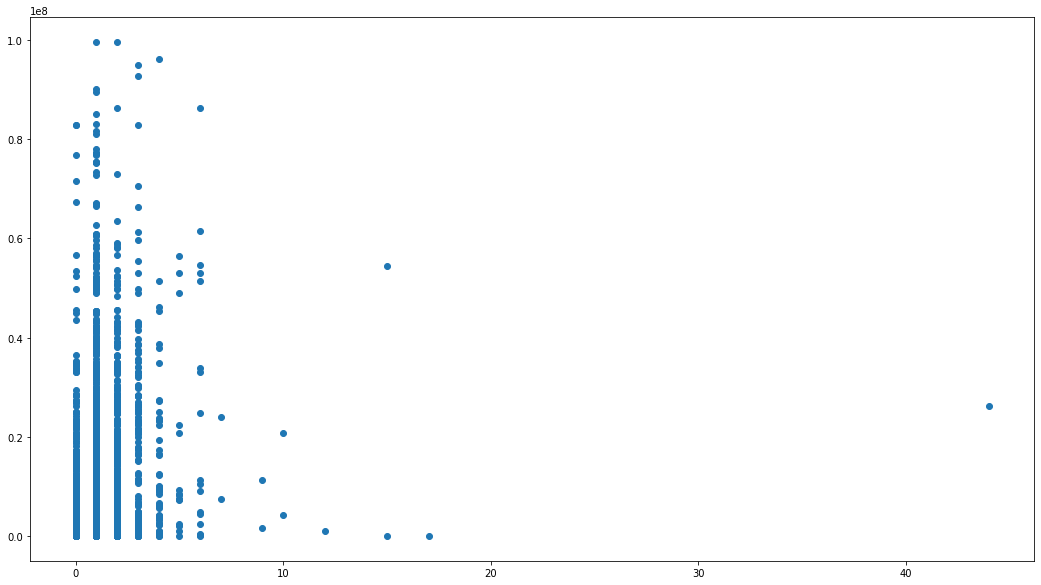

In [224]:
# Scatter Plot
fig, ax = plt.subplots(figsize =(18, 10))
ax.scatter(train_data["total_male"], train_data["total_cost"]);

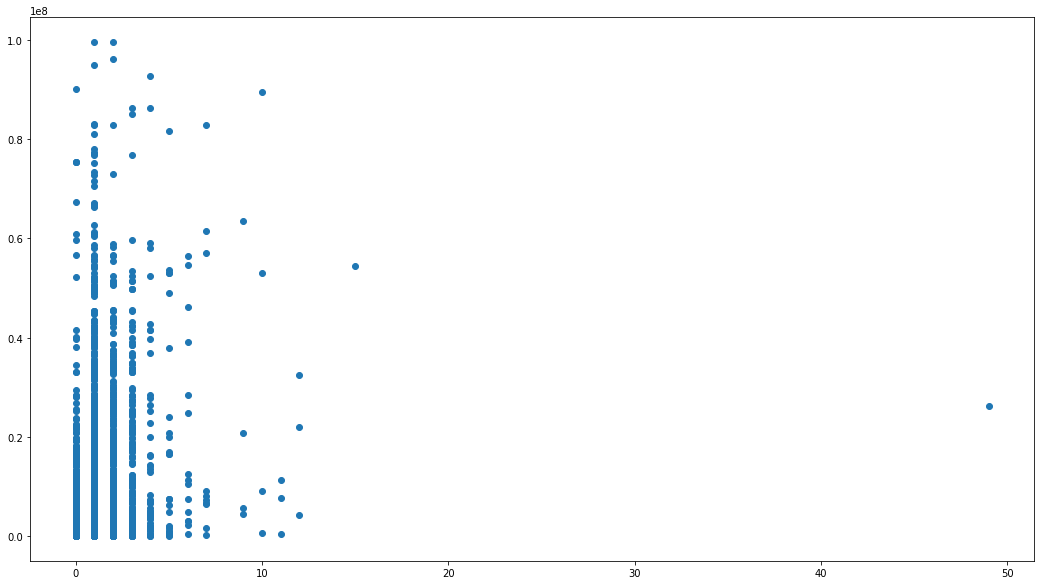

In [225]:
# Scatter Plot
fig, ax = plt.subplots(figsize =(18, 10))
ax.scatter(train_data["total_female"], train_data["total_cost"]);

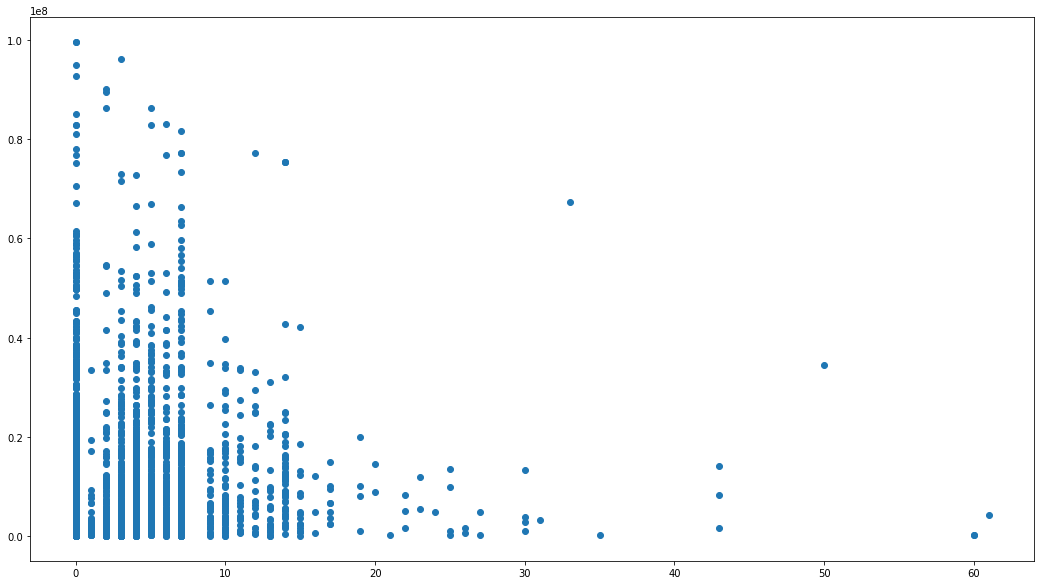

In [226]:
# Scatter Plot
fig, ax = plt.subplots(figsize =(18, 10))
ax.scatter(train_data["night_zanzibar"], train_data["total_cost"]);

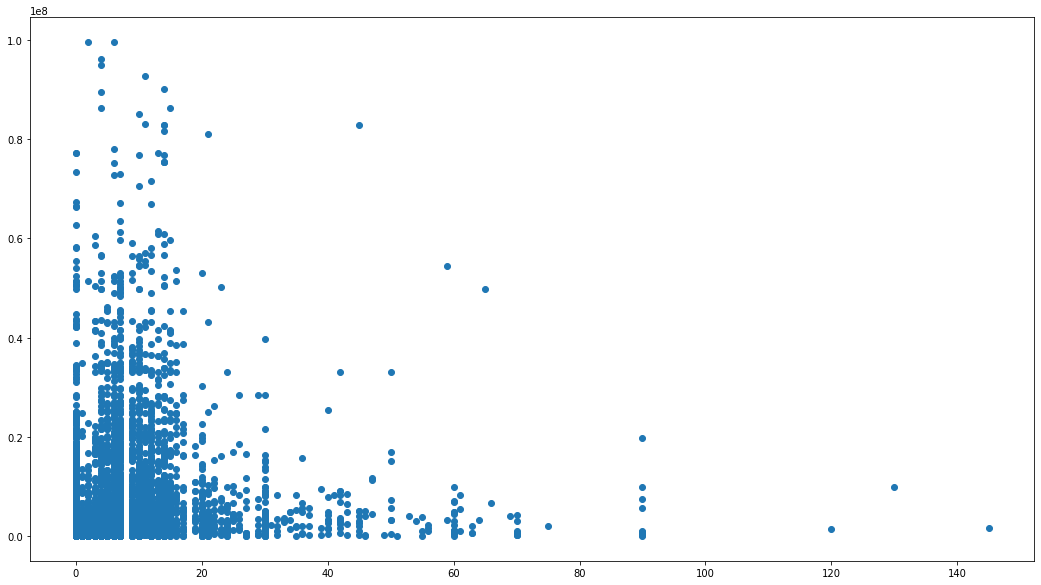

In [227]:
# Scatter Plot
fig, ax = plt.subplots(figsize =(18, 10))
ax.scatter(train_data["night_mainland"], train_data["total_cost"]);

In [228]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            4809 non-null   object 
 4   total_female           4809 non-null   float64
 5   total_male             4809 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

ID, country, age_group, travel_with, purpose, main_activity, info_source, tour_arrangement, package_transport_int, package_accomodation, package_food, package_transport_tz, package_sightseeing, package_guided_tour, package_insurance, payment_mode, first_trip_tz, most_impressing

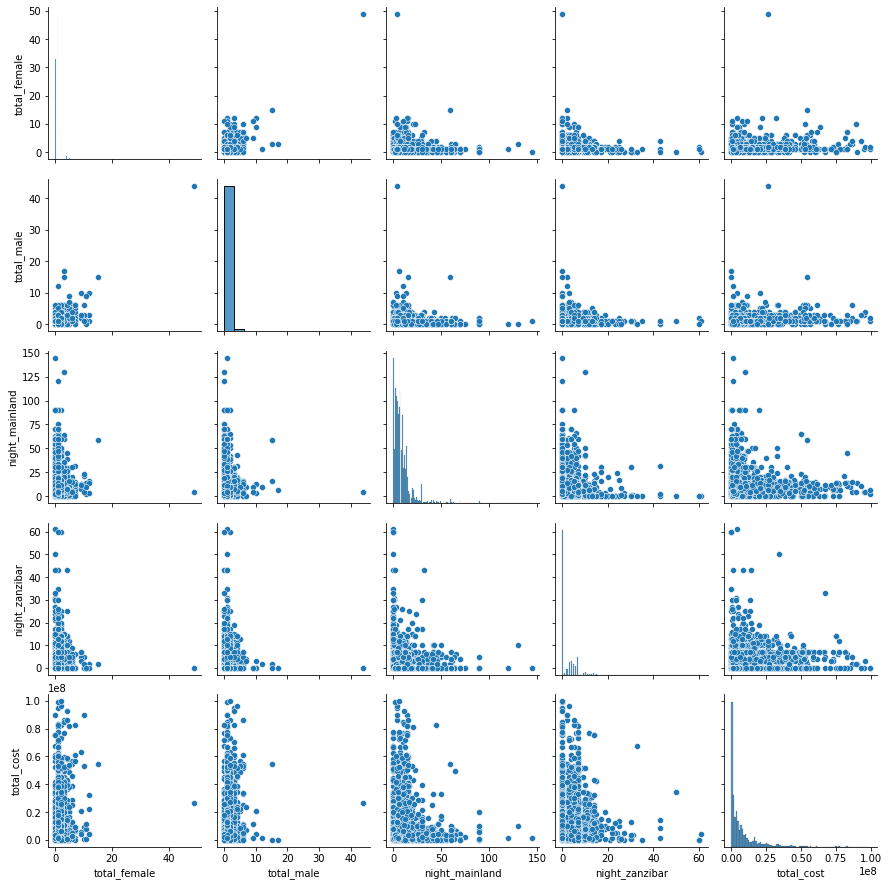

In [229]:
sns.pairplot(train_data)

### EDA

* It is a good idea to explore the data once again after manipulating it.

### Building a Regression model

In [230]:
# Create X (all the feature columns)
X = train_data.drop("total_cost", axis=1)

# Create y (the target column)
y = train_data["total_cost"]

In [231]:
# Let's one-hot encode our categorical columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["ID", "country", "age_group", "travel_with", "purpose", "main_activity", "info_source",
                        "tour_arrangement", "package_transport_int", "package_accomodation", 
                        "package_food", "package_transport_tz", "package_sightseeing", "package_guided_tour",
                        "package_insurance","payment_mode", "first_trip_tz", "most_impressing"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough",
                                 sparse_threshold=0)
transformed_X_train = transformer.fit_transform(train_data)
transformed_X_test = transformer.fit_transform(test_data)


In [232]:
# Set random seed
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_w_indicators = pd.get_dummies(X)
Xtr, Xva, ytr, yva = train_test_split(X_w_indicators, y, test_size=0.2, random_state=0)

In [233]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
model = regr.fit(Xtr, ytr)

print(regr.score(Xva, yva))

0.344549450445196


In [234]:
print(model.intercept_)

8932113.778847408


In [235]:
print(model.coef_)

[  733926.29186812   552217.25950856    83466.86285453 ...
 -2761835.02162826   -58929.37920734   823826.56920596]


In [256]:
X_test = test_data
y_pred=regr.predict(X_test)
y_pred

ValueError: could not convert string to float: 'tour_1'

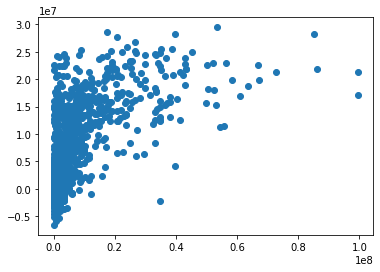

In [257]:
plt.scatter(yva, y_pred)

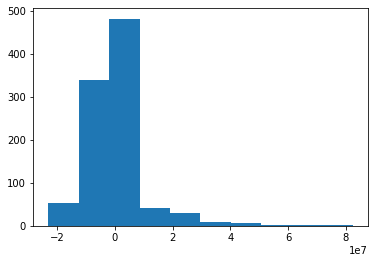

In [258]:
plt.hist(yva - y_pred);

### Evaluate Model Performances

### Testing Linear Model Assumptions

### Actionable Insights and Recommendations

In [ ]:
# Set random seed
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X_train,
                                                    y,
                                                    test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape